<h2> 6. Features and Shap </h2>

In [1]:
import sys, os; sys.path.insert(0, os.path.dirname(os.getcwd()))
import pandas as pd
import utils.io
import utils.preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
import shap
# Environment settings:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_column', None)

In [2]:
data = utils.io.retrieve_processed_dataset()

In [3]:
data

,CountryCode,Year,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CREL.MT,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,AG.SRF.TOTL.K2,AG.YLD.CREL.KG,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD.DT,BX.TRF.PWKR.DT.GD.ZS,DC.DAC.CECL.CD,DC.DAC.DEUL.CD,DC.DAC.FRAL.CD,DC.DAC.JPNL.CD,DC.DAC.TOTL.CD,DT.NFL.UNDP.CD,DT.NFL.UNTA.CD,DT.ODA.ALLD.CD,DT.ODA.ALLD.KD,DT.ODA.ODAT.CD,DT.ODA.ODAT.KD,DT.ODA.ODAT.PC.ZS,EA.PRD.AGRI.KD,EG.EGY.PRIM.PP.KD,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.POP.DNST,EN.URB.LCTY.UR.ZS,ER.LND.PTLD.ZS,ER.PTD.TOTL.ZS,FP.CPI.TOTL.ZG,IP.JRN.ARTC.SC,IS.AIR.DPRT,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,IT.CEL.SETS,IT.CEL.SETS.P2,IT.MLT.MAIN,IT.MLT.MAIN.P2,IT.NET.USER.P2,MS.MIL.TOTL.P1,MS.MIL.TOTL.TF.ZS,NE.CON.GOVT.CD,NE.CON.GOVT.ZS,NE.CON.PETC.CD,NE.CON.PETC.ZS,NE.CON.PRVT.CD,NE.CON.PRVT.PP.CD,NE.CON.TETC.CD,NE.DAB.TOTL.CD,NE.DAB.TOTL.CN,NE.EXP.GNFS.CD,NE.EXP.GNFS.CN,NE.EXP.GNFS.ZS,NE.GDI.FTOT.CD,NE.GDI.FTOT.ZS,NE.GDI.TOTL.CD,NE.GDI.TOTL.CN,NE.GDI.TOTL.ZS,NE.IMP.GNFS.CD,NE.IMP.GNFS.CN,NE.IMP.GNFS.ZS,NE.RSB.GNFS.CD,NE.RSB.GNFS.CN,NE.RSB.GNFS.ZS,NE.TRD.GNFS.ZS,NV.AGR.TOTL.CD,NV.AGR.TOTL.CN,NV.AGR.TOTL.KD,NV.AGR.TOTL.KD.ZG,NV.AGR.TOTL.ZS,NV.IND.MANF.CD,NV.IND.MANF.KD,NV.IND.MANF.KD.ZG,NV.IND.MANF.ZS,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.IND.TOTL.KD,NV.IND.TOTL.KD.ZG,NV.IND.TOTL.ZS,NV.SRV.TETC.CD,NV.SRV.TETC.CN,NV.SRV.TETC.KD,NV.SRV.TETC.KD.ZG,NV.SRV.TETC.ZS,NY.ADJ.AEDU.CD,NY.ADJ.AEDU.GN.ZS,NY.ADJ.DCO2.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DKAP.CD,NY.ADJ.DKAP.GN.ZS,NY.ADJ.DMIN.CD,NY.ADJ.DMIN.GN.ZS,NY.ADJ.DNGY.CD,NY.ADJ.DNGY.GN.ZS,NY.ADJ.DRES.GN.ZS,NY.ADJ.ICTR.GN.ZS,NY.ADJ.NNAT.GN.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.GDP.COAL.RT.ZS,NY.GDP.DEFL.KD.ZG,NY.GDP.DEFL.ZS,NY.GDP.FCST.CD,NY.GDP.FRST.RT.ZS,NY.GDP.MINR.RT.ZS,NY.GDP.MKTP.CD,NY.GDP.MKTP.CN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.MKTP.KN,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.KD,NY.GDP.NGAS.RT.ZS,NY.GDP.PCAP.CD,NY.GDP.PCAP.CN,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,NY.GDP.PCAP.KN,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.KD,NY.GDP.PETR.RT.ZS,NY.GDP.TOTL.RT.ZS,NY.GDS.TOTL.CD,NY.GDS.TOTL.ZS,NY.GNP.ATLS.CD,NY.GNP.MKTP.CD,NY.GNP.MKTP.CN,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CN,NY.GNP.PCAP.PP.CD,NY.GNS.ICTR.GN.ZS,NY.GNS.ICTR.ZS,NY.GSR.NFCY.CD,NY.GSR.NFCY.CN,PA.NUS.ATLS,PA.NUS.PPP,PA.NUS.PPPC.RF,SE.ENR.PRIM.FM.ZS,SE.PRM.AGES,SE.PRM.DURS,SE.PRM.ENRL,SE.PRM.ENRL.FE.ZS,SE.PRM.ENRR,SE.PRM.ENRR.FE,SE.PRM.ENRR.MA,SE.SEC.AGES,SE.SEC.DURS,SE.SEC.ENRL.GC,SE.SEC.ENRL.GC.FE.ZS,SH.ANM.CHLD.ZS,SH.ANM.NPRG.ZS,SH.DTH.IMRT,SH.DTH.MORT,SH.DTH.NMRT,SH.DYN.MORT,SH.DYN.NMRT,SH.H2O.SAFE.RU.ZS,SH.H2O.SAFE.UR.ZS,SH.H2O.SAFE.ZS,SH.IMM.IDPT,SH.IMM.MEAS,SH.MMR.DTHS,SH.MMR.RISK,SH.MMR.RISK.ZS,SH.PRG.ANEM,SH.STA.ACSN,SH.STA.ACSN.RU,SH.STA.ACSN.UR,SH.STA.MMRT,SH.TBS.DTEC.ZS,SH.TBS.INCD,SL.EMP.1524.SP.FE.ZS,SL.EMP.1524.SP.MA.ZS,SL.EMP.1524.SP.ZS,SL.EMP.TOTL.SP.FE.ZS,SL.EMP.TOTL.SP.MA.ZS,SL.EMP.TOTL.SP.ZS,SL.TLF.ACTI.1524.FE.ZS,SL.TLF.ACTI.1524.MA.ZS,SL.TLF.ACTI.1524.ZS,SL.TLF.ACTI.FE.ZS,SL.TLF.ACTI.MA.ZS,SL.TLF.ACTI.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.CACT.FM.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SM.POP.REFG,SM.POP.REFG.OR,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TG.VAL.TOTL.GD.ZS,TM.VAL.MRCH.AL.ZS,TM.VAL.MRCH.CD.WT,TM.VAL.M

##### Keep only data for training

In [4]:
data = data.select_dtypes(include = 'number').dropna()
y = data['target']
X = data.drop(columns = 'target')

First we make a model with all features, to see how it performs, using a simple Gradient Boosting Method model.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
model = xgboost.XGBRegressor() # Simple model of Gradient Boosting Method

'gbm = ensemble.GradientBoostingClassifier(\n            n_estimators=500,\n            validation_fraction=0.2,\n            n_iter_no_change=5,\n            tol=0.01,\n            random_state=0)\ngbm = ensemble.GradientBoostingClassifier(\n            n_estimators=n_estimators,\n            random_state=0)\ngbm.fit(X_train, y_train)\n'

"gbm_hyperparams = {\n    'n_estimators': 500,\n    'max_depth': 10,\n    'learning_rate': 0.05,\n    'loss': 'ls'\n    random_state = 0\n}"

In [7]:
weights_train = 1# + (X_train['Year'] - 1960)/50
weights_test = 1 #+ (X_test['Year'] - 1960)/50

In [8]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error
def mape(y, y_):
    return abs((y-y_)/y).mean()

In [10]:
y_ = model.predict(X_test)

In [11]:
print(f"{mape(y_test, y_) = }")
print(f"{mean_absolute_error(y_test, y_) = }")
print(f"{r2_score(y_test, y_) = }")

mape(y_test, y_) = inf
mean_absolute_error(y_test, y_) = 2.551737284145325
r2_score(y_test, y_) = 0.2303740563622051


As we can see,  $R^2 = 0.2303$, we obtained an awful correlation. We have to improve the model.

### Feature selection

One way of simplifying our model is to select the number of features and just choosing the more relevant.

In [96]:
# From mlxtend
sfs = SequentialFeatureSelector(model, k_features=10, forward=True, floating=False, verbose=2, scoring='r2', cv=0, n_jobs=1)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=0,
                          estimator=XGBRegressor(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1, gamma=0,
                                                 gpu_id=-1,
                                                 importance_type='gain',
                                                 interaction_constraints='',
                                                 learning_rate=0.300000012,
                                                 max_delta_step=0, max_depth=6,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                              

Trying with the 10 more relevant features we can repeat a similar model than previously

In [0]:
features = list(sfs.k_feature_names_)
features

In [182]:
model.fit(X_train[features], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [183]:
y_ = model.predict(X_test[features])

print(f"{mape(y_test, y_) = }")
print(f"{mean_absolute_error(y_test, y_) = }")
print(f"{r2_score(y_test, y_) = }")

mape(y_test, y_) = inf
mean_absolute_error(y_test, y_) = 2.706088671023407
r2_score(y_test, y_) = -0.07711246473532185


Ok, this going horribly bad. The correlation is as low as it can get. Being positive, from now on we can only increase it.

### Shap
For visualizing the effects the different indicators do in our model so we can try to narrow down a bit the search for the correct ones, we use the <code> shap </code> library.

In [14]:
shap.initjs()
explainer = shap.TreeExplainer(model)

In [15]:
%%time
shap_values = explainer.shap_values(X_test)

CPU times: user 3.04 s, sys: 0 ns, total: 3.04 s
Wall time: 788 ms


In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

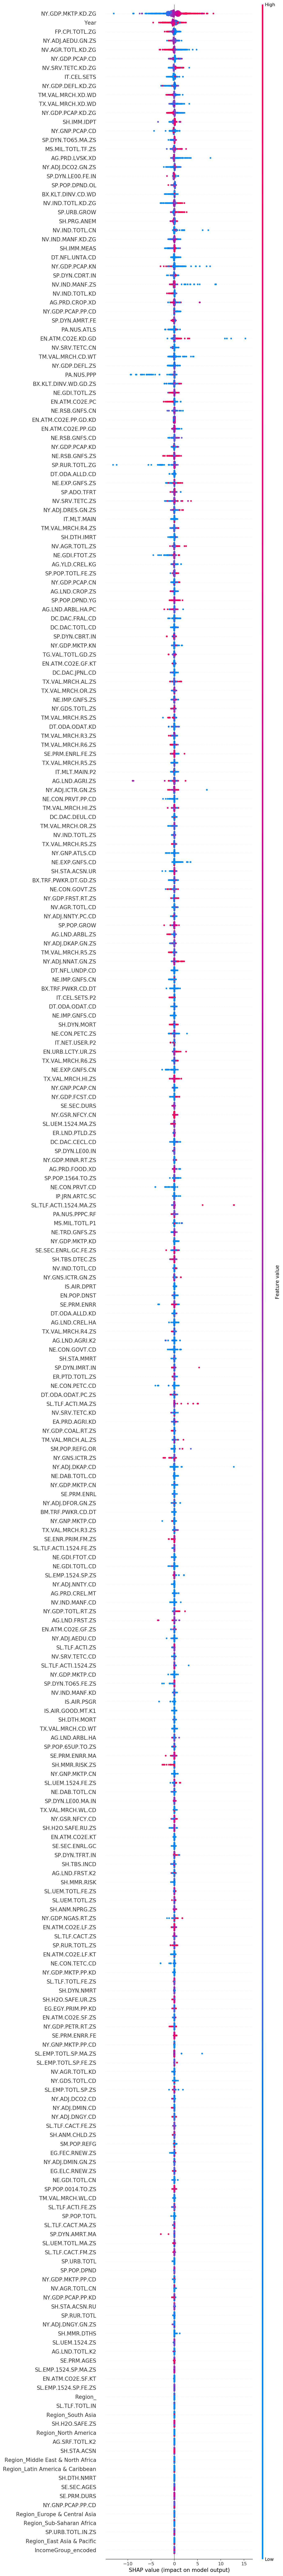

In [17]:
shap.summary_plot(shap_values, X_test, max_display=X.shape[1])

Just to name a few of the first and most important indicators in our model:
- NY.GDP.MKTP.KD.ZG -> GDP growth (annual %)
- Year
- FP.CPI.TOTL.ZG &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;-> Inflation, consumer prices (annual %)
- NY.ADJ.AEDU.GN.ZS  -> Adjusted savings: education expenditure (% of GNI)
- NV.AGR.TOTL.KD.ZG  -> Agriculture, forestry, and fishing, value added (annual % growth)

In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [163]:
shap.initjs()
i = 1321
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])

In [164]:
X_test.iloc[i:i+1]

,Year,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CREL.MT,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,AG.SRF.TOTL.K2,AG.YLD.CREL.KG,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD.DT,BX.TRF.PWKR.DT.GD.ZS,DC.DAC.CECL.CD,DC.DAC.DEUL.CD,DC.DAC.FRAL.CD,DC.DAC.JPNL.CD,DC.DAC.TOTL.CD,DT.NFL.UNDP.CD,DT.NFL.UNTA.CD,DT.ODA.ALLD.CD,DT.ODA.ALLD.KD,DT.ODA.ODAT.CD,DT.ODA.ODAT.KD,DT.ODA.ODAT.PC.ZS,EA.PRD.AGRI.KD,EG.EGY.PRIM.PP.KD,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.POP.DNST,EN.URB.LCTY.UR.ZS,ER.LND.PTLD.ZS,ER.PTD.TOTL.ZS,FP.CPI.TOTL.ZG,IP.JRN.ARTC.SC,IS.AIR.DPRT,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,IT.CEL.SETS,IT.CEL.SETS.P2,IT.MLT.MAIN,IT.MLT.MAIN.P2,IT.NET.USER.P2,MS.MIL.TOTL.P1,MS.MIL.TOTL.TF.ZS,NE.CON.GOVT.CD,NE.CON.GOVT.ZS,NE.CON.PETC.CD,NE.CON.PETC.ZS,NE.CON.PRVT.CD,NE.CON.PRVT.PP.CD,NE.CON.TETC.CD,NE.DAB.TOTL.CD,NE.DAB.TOTL.CN,NE.EXP.GNFS.CD,NE.EXP.GNFS.CN,NE.EXP.GNFS.ZS,NE.GDI.FTOT.CD,NE.GDI.FTOT.ZS,NE.GDI.TOTL.CD,NE.GDI.TOTL.CN,NE.GDI.TOTL.ZS,NE.IMP.GNFS.CD,NE.IMP.GNFS.CN,NE.IMP.GNFS.ZS,NE.RSB.GNFS.CD,NE.RSB.GNFS.CN,NE.RSB.GNFS.ZS,NE.TRD.GNFS.ZS,NV.AGR.TOTL.CD,NV.AGR.TOTL.CN,NV.AGR.TOTL.KD,NV.AGR.TOTL.KD.ZG,NV.AGR.TOTL.ZS,NV.IND.MANF.CD,NV.IND.MANF.KD,NV.IND.MANF.KD.ZG,NV.IND.MANF.ZS,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.IND.TOTL.KD,NV.IND.TOTL.KD.ZG,NV.IND.TOTL.ZS,NV.SRV.TETC.CD,NV.SRV.TETC.CN,NV.SRV.TETC.KD,NV.SRV.TETC.KD.ZG,NV.SRV.TETC.ZS,NY.ADJ.AEDU.CD,NY.ADJ.AEDU.GN.ZS,NY.ADJ.DCO2.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DFOR.GN.ZS,NY.ADJ.DKAP.CD,NY.ADJ.DKAP.GN.ZS,NY.ADJ.DMIN.CD,NY.ADJ.DMIN.GN.ZS,NY.ADJ.DNGY.CD,NY.ADJ.DNGY.GN.ZS,NY.ADJ.DRES.GN.ZS,NY.ADJ.ICTR.GN.ZS,NY.ADJ.NNAT.GN.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.GDP.COAL.RT.ZS,NY.GDP.DEFL.KD.ZG,NY.GDP.DEFL.ZS,NY.GDP.FCST.CD,NY.GDP.FRST.RT.ZS,NY.GDP.MINR.RT.ZS,NY.GDP.MKTP.CD,NY.GDP.MKTP.CN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.MKTP.KN,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.KD,NY.GDP.NGAS.RT.ZS,NY.GDP.PCAP.CD,NY.GDP.PCAP.CN,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,NY.GDP.PCAP.KN,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.KD,NY.GDP.PETR.RT.ZS,NY.GDP.TOTL.RT.ZS,NY.GDS.TOTL.CD,NY.GDS.TOTL.ZS,NY.GNP.ATLS.CD,NY.GNP.MKTP.CD,NY.GNP.MKTP.CN,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CN,NY.GNP.PCAP.PP.CD,NY.GNS.ICTR.GN.ZS,NY.GNS.ICTR.ZS,NY.GSR.NFCY.CD,NY.GSR.NFCY.CN,PA.NUS.ATLS,PA.NUS.PPP,PA.NUS.PPPC.RF,SE.ENR.PRIM.FM.ZS,SE.PRM.AGES,SE.PRM.DURS,SE.PRM.ENRL,SE.PRM.ENRL.FE.ZS,SE.PRM.ENRR,SE.PRM.ENRR.FE,SE.PRM.ENRR.MA,SE.SEC.AGES,SE.SEC.DURS,SE.SEC.ENRL.GC,SE.SEC.ENRL.GC.FE.ZS,SH.ANM.CHLD.ZS,SH.ANM.NPRG.ZS,SH.DTH.IMRT,SH.DTH.MORT,SH.DTH.NMRT,SH.DYN.MORT,SH.DYN.NMRT,SH.H2O.SAFE.RU.ZS,SH.H2O.SAFE.UR.ZS,SH.H2O.SAFE.ZS,SH.IMM.IDPT,SH.IMM.MEAS,SH.MMR.DTHS,SH.MMR.RISK,SH.MMR.RISK.ZS,SH.PRG.ANEM,SH.STA.ACSN,SH.STA.ACSN.RU,SH.STA.ACSN.UR,SH.STA.MMRT,SH.TBS.DTEC.ZS,SH.TBS.INCD,SL.EMP.1524.SP.FE.ZS,SL.EMP.1524.SP.MA.ZS,SL.EMP.1524.SP.ZS,SL.EMP.TOTL.SP.FE.ZS,SL.EMP.TOTL.SP.MA.ZS,SL.EMP.TOTL.SP.ZS,SL.TLF.ACTI.1524.FE.ZS,SL.TLF.ACTI.1524.MA.ZS,SL.TLF.ACTI.1524.ZS,SL.TLF.ACTI.FE.ZS,SL.TLF.ACTI.MA.ZS,SL.TLF.ACTI.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.CACT.FM.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SM.POP.REFG,SM.POP.REFG.OR,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TG.VAL.TOTL.GD.ZS,TM.VAL.MRCH.AL.ZS,TM.VAL.MRCH.CD.WT,TM.VAL.MRCH.HI.ZS,TM

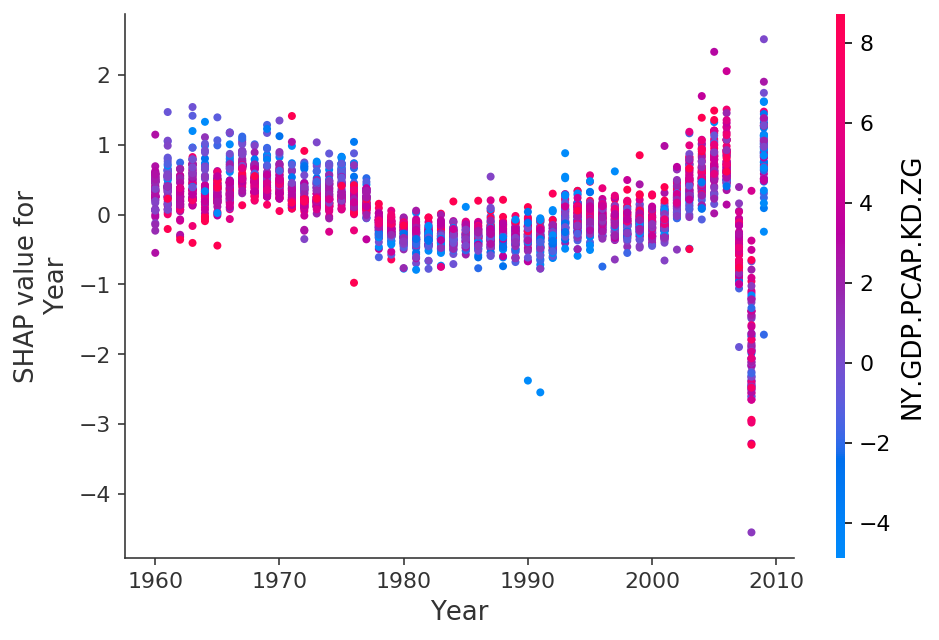

In [165]:
shap.dependence_plot("Year", shap_values, X_test)

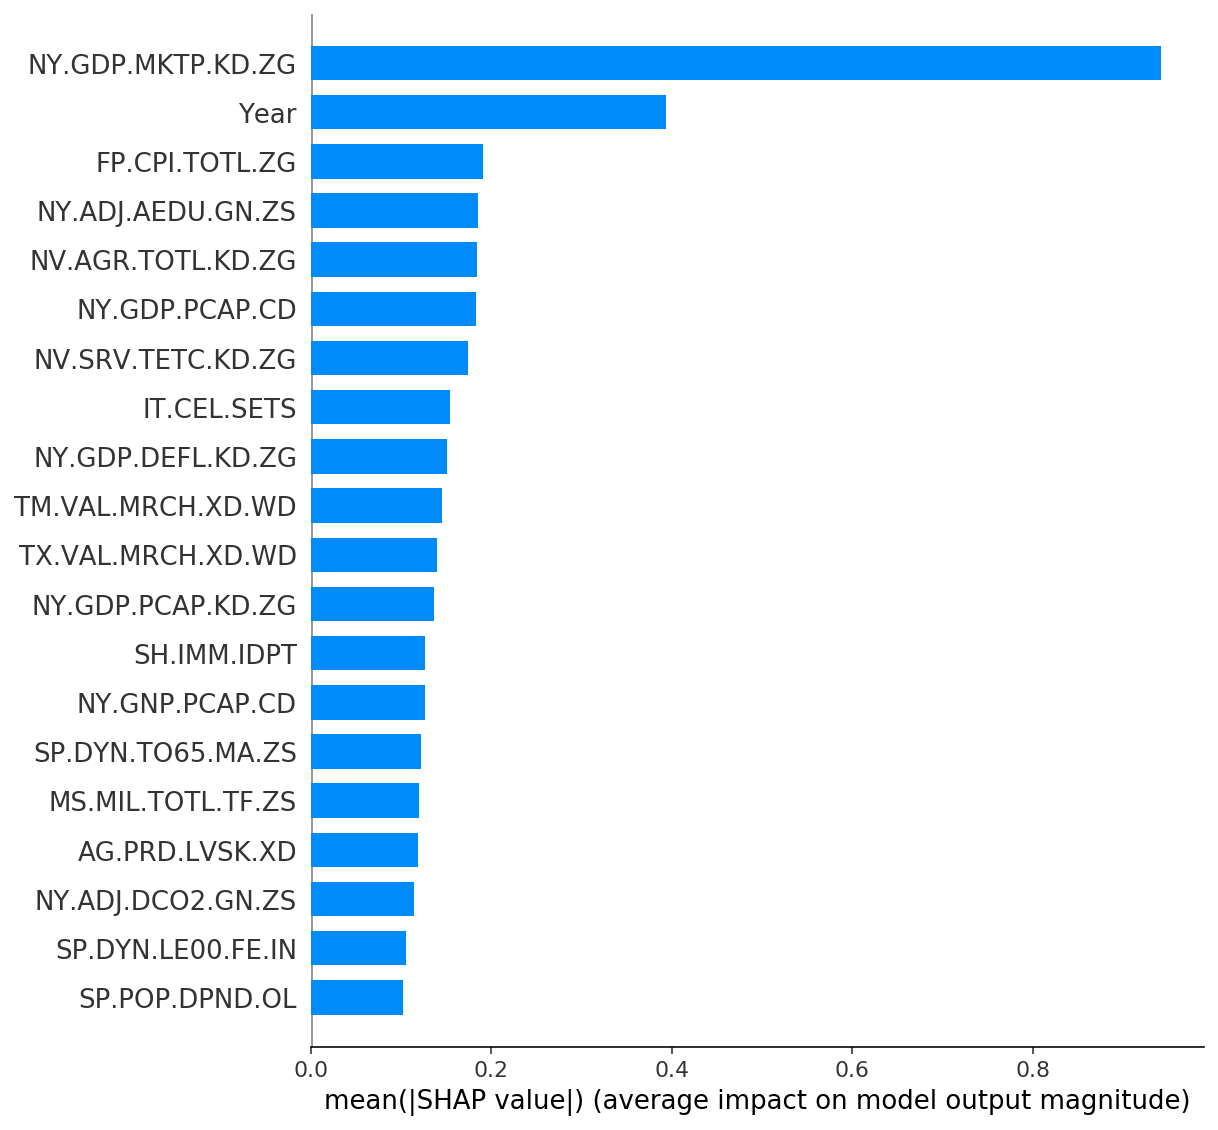

In [127]:
shap.summary_plot(shap_values, X_test, plot_type="bar") # This gives us the most relevant indicators of the model

Using the <code>shap</code> library we can choose a better indicator choice than in previous cases.

In [20]:
feature_idx = (-abs(shap_values).mean(axis=0)).argsort()[:50]
feature_names = X_test.columns[feature_idx]
feature_idx
feature_names

array([133,   0,  53, 109,  92, 138, 106,  58, 125, 261, 272, 141, 185,
       153, 234,  64,  14, 111, 229, 239,  18, 101, 247, 190,  99,  96,
       186,  28, 142, 227,  97, 100,  12, 143, 224, 160,  40, 104, 252,
       126, 161,  19,  81,  44,  86,  46,  45,  85, 140,  87])

Index(['NY.GDP.MKTP.KD.ZG', 'Year', 'FP.CPI.TOTL.ZG', 'NY.ADJ.AEDU.GN.ZS',
       'NV.AGR.TOTL.KD.ZG', 'NY.GDP.PCAP.CD', 'NV.SRV.TETC.KD.ZG',
       'IT.CEL.SETS', 'NY.GDP.DEFL.KD.ZG', 'TM.VAL.MRCH.XD.WD',
       'TX.VAL.MRCH.XD.WD', 'NY.GDP.PCAP.KD.ZG', 'SH.IMM.IDPT',
       'NY.GNP.PCAP.CD', 'SP.DYN.TO65.MA.ZS', 'MS.MIL.TOTL.TF.ZS',
       'AG.PRD.LVSK.XD', 'NY.ADJ.DCO2.GN.ZS', 'SP.DYN.LE00.FE.IN',
       'SP.POP.DPND.OL', 'BX.KLT.DINV.CD.WD', 'NV.IND.TOTL.KD.ZG',
       'SP.URB.GROW', 'SH.PRG.ANEM', 'NV.IND.TOTL.CN', 'NV.IND.MANF.KD.ZG',
       'SH.IMM.MEAS', 'DT.NFL.UNTA.CD', 'NY.GDP.PCAP.KN', 'SP.DYN.CDRT.IN',
       'NV.IND.MANF.ZS', 'NV.IND.TOTL.KD', 'AG.PRD.CROP.XD',
       'NY.GDP.PCAP.PP.CD', 'SP.DYN.AMRT.FE', 'PA.NUS.ATLS',
       'EN.ATM.CO2E.KD.GD', 'NV.SRV.TETC.CN', 'TM.VAL.MRCH.CD.WT',
       'NY.GDP.DEFL.ZS', 'PA.NUS.PPP', 'BX.KLT.DINV.WD.GD.ZS',
       'NE.GDI.TOTL.ZS', 'EN.ATM.CO2E.PC', 'NE.RSB.GNFS.CN',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.CO2E.PP.GD', 'NE.RSB.GNFS